### Project 2 - CiFAR-10 Images Classification Using CNNs

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

In [0]:
#  Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

In [0]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 1)

### Visualizing Data

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[2]')

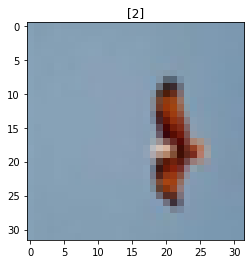

In [8]:
# visualizing a random image
i = 1009
plt.imshow(X_train[i])
plt.title(y_train[i])

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


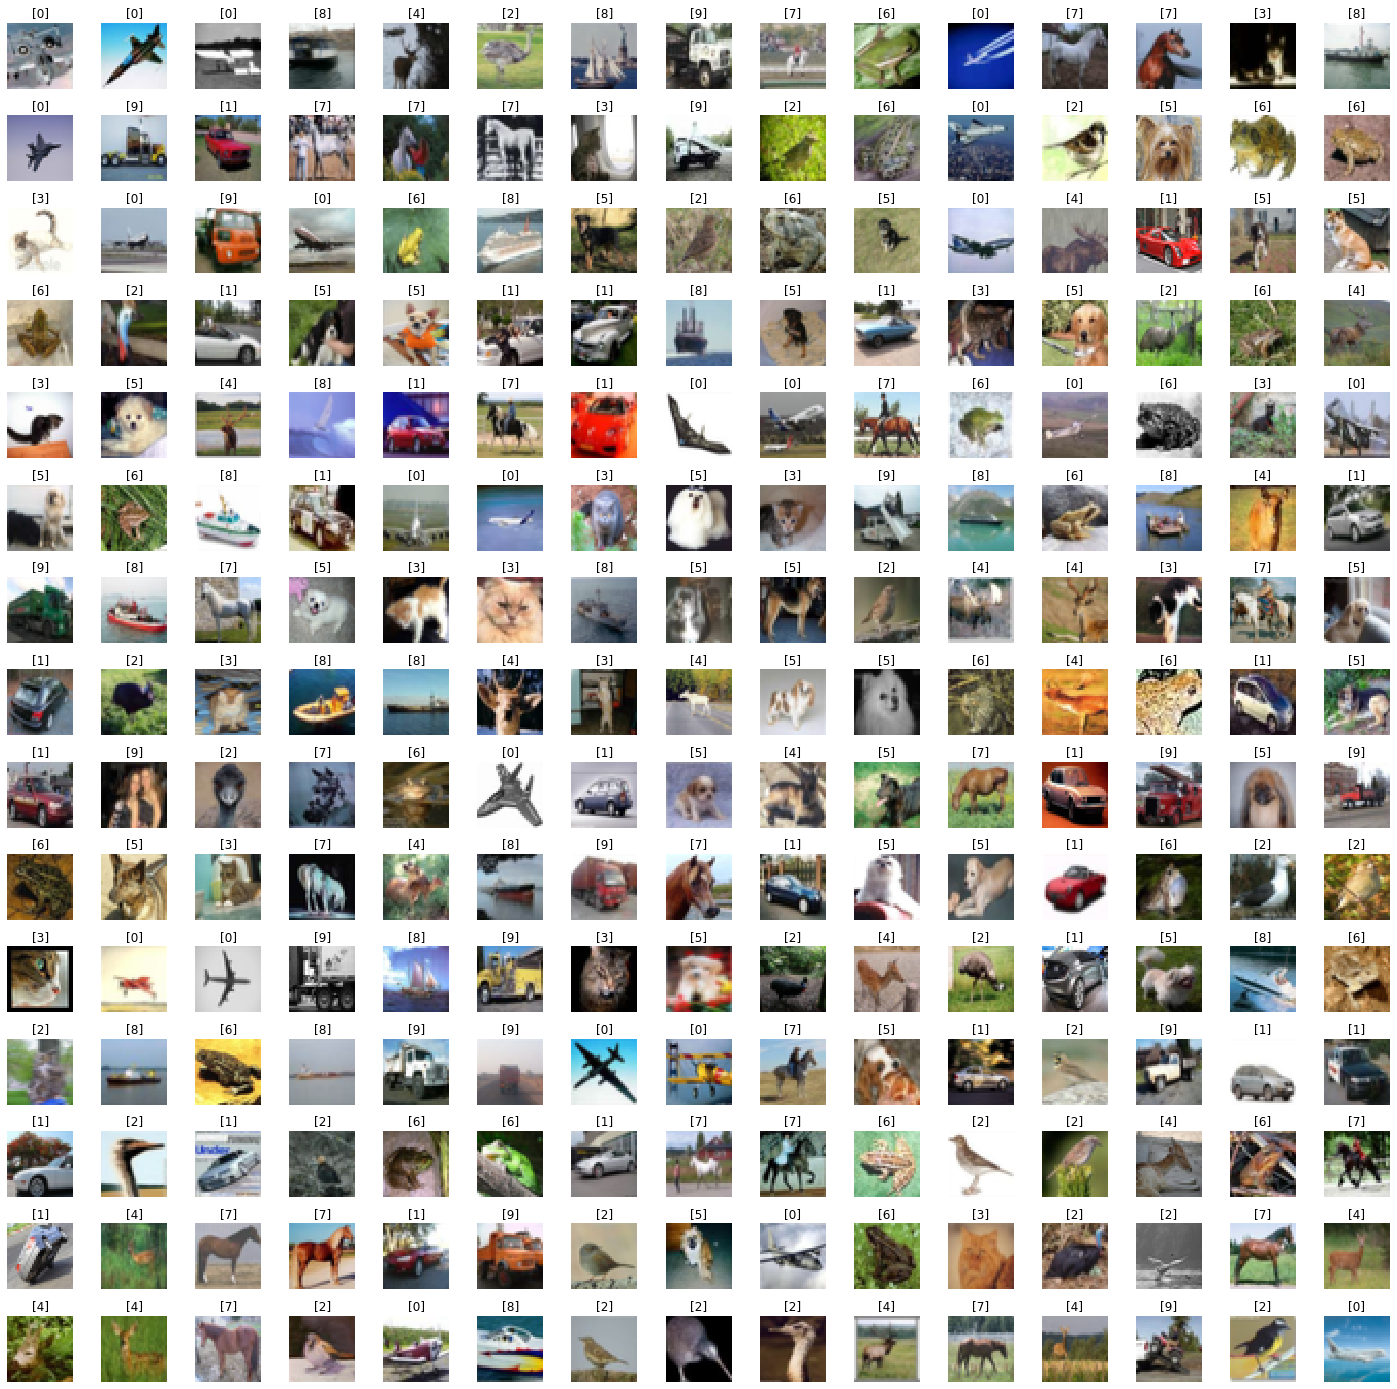

In [19]:
# visualizing few random images
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize=(25,25))
axes = axes.ravel()

n_training = len(X_train)
for i in np.arange(0, L_grid*W_grid):
  #pick a random image
  img_index = np.random.randint(0, n_training)
  axes[i].imshow(X_train[img_index])
  axes[i].set_title(y_train[img_index])
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)
  

### Data Preparation

In [0]:
# convert to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
# convert the target labels to categorical - one hot encoding
from tensorflow.keras.utils import to_categorical
number_cat = 10

y_train = to_categorical(y_train, num_classes=number_cat)
y_test = to_categorical(y_test, num_classes=number_cat)

y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
# Normalizing the data
X_train = X_train/255
X_test = X_test/255


In [12]:
# shape of a single image
input_shape = X_train.shape[1:]
input_shape

(32, 32, 3)

### Model Training

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense , Flatten, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import TensorBoard

In [0]:
# Model architecture

# initialize the model
cnn_model = Sequential()

#  CNN layer
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape = input_shape))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

#  CNN layer 
cnn_model.add(Conv2D(filters=124, kernel_size=(3,3),activation='relu'))
#cnn_model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

# Flatten 
cnn_model.add(Flatten())

# connecting layer
cnn_model.add(Dense(units=512, activation='relu'))
cnn_model.add(Dense(units=512, activation='relu'))

# output layer
cnn_model.add(Dense(units=10, activation='softmax'))

In [0]:
# compile the model
cnn_model.compile(optimizer=Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
# fit the model
history= cnn_model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split = 0.3, shuffle=True)

Train on 35000 samples, validate on 15000 samples
Epoch 1/50
35000/35000 [==============================] - 6s 163us/sample - loss: 1.7194 - acc: 0.3631 - val_loss: 1.5036 - val_acc: 0.4614
Epoch 2/50
35000/35000 [==============================] - 6s 159us/sample - loss: 1.3977 - acc: 0.4892 - val_loss: 1.2776 - val_acc: 0.5438
Epoch 3/50
35000/35000 [==============================] - 5s 155us/sample - loss: 1.2789 - acc: 0.5373 - val_loss: 1.1536 - val_acc: 0.5937
Epoch 4/50
35000/35000 [==============================] - 5s 157us/sample - loss: 1.2042 - acc: 0.5659 - val_loss: 1.0653 - val_acc: 0.6217
Epoch 5/50
35000/35000 [==============================] - 6s 158us/sample - loss: 1.1460 - acc: 0.5936 - val_loss: 1.0462 - val_acc: 0.6285
Epoch 6/50
35000/35000 [==============================] - 5s 157us/sample - loss: 1.1059 - acc: 0.6070 - val_loss: 1.0078 - val_acc: 0.6438
Epoch 7/50
35000/35000 [==============================] - 5s 157us/sample - loss: 1.0655 - acc: 0.6212 - val_l

### Evaluation

In [42]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

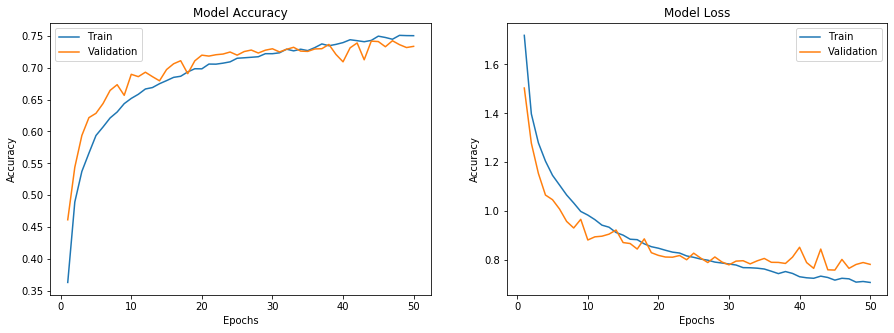

In [44]:
# Learning Curve
epoch_range = range(1,51)
fig = plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(epoch_range, history.history['acc'], label = "Train")
plt.plot(epoch_range, history.history['val_acc'], label = "Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch_range, history.history['loss'], label = "Train")
plt.plot(epoch_range, history.history['val_loss'], label = "Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Loss")
plt.legend()

In [45]:
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

10000/10000 [==============================] - 1s 74us/sample - loss: 0.7924 - acc: 0.7257
Test Accuracy: 0.7257000207901001


In [46]:
# Prediction
predict_classes = cnn_model.predict_classes(X_test)
predict_classes

array([3, 8, 8, ..., 5, 1, 7])

In [47]:
# converting y_test back to original form
actual_class = y_test.argmax(1)
actual_class

array([3, 8, 8, ..., 5, 1, 7])

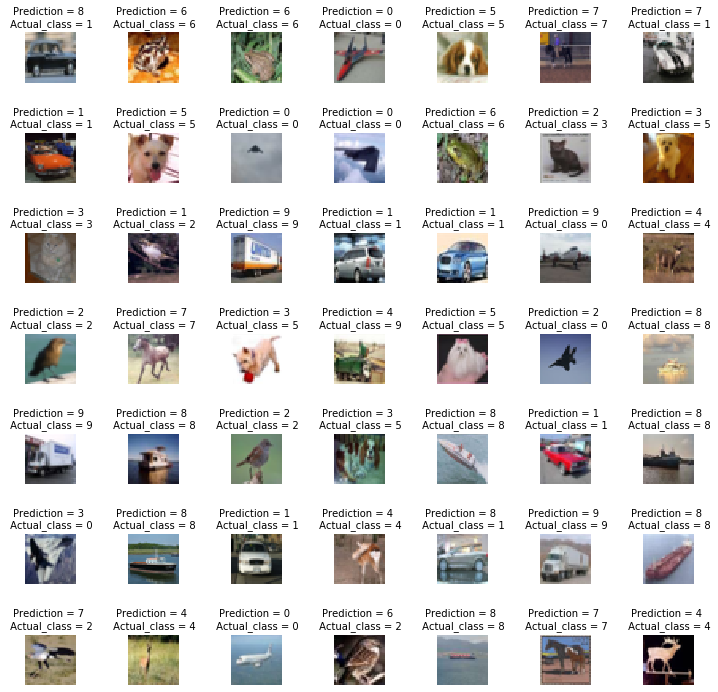

In [48]:
# Visualizing Prediction vs the prediction
W_grid = 7
L_grid = 7

fig, axes = plt.subplots(L_grid, W_grid, figsize=(12,12))
axes = axes.ravel()

n_training = len(X_test)
for i in np.arange(0, L_grid*W_grid):
  #pick a random image
  img_index = np.random.randint(0, n_training)
  axes[i].imshow(X_test[img_index])
  axes[i].set_title(f'Prediction = {predict_classes[img_index]} \n Actual_class = {actual_class[img_index]}',fontsize = 10 )
  axes[i].axis('off')
plt.subplots_adjust(hspace=1,wspace=1)

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f180e2173c8>)

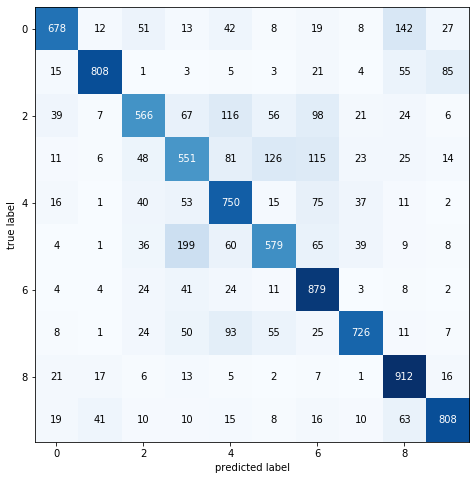

In [49]:
# confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

conf_mat = confusion_matrix(actual_class, predict_classes)
plot_confusion_matrix(conf_mat, figsize=(10,8))

### Saving Model

In [0]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
  os.makedirs(directory)
model_path = os.path.join(directory, 'cifar10_model.h5')
cnn_model.save(model_path)

### Data Augmentation

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [52]:
# selecting a sample of train images
n = 8
X_train_sample = X_train[:n]
X_train_sample.shape

(8, 32, 32, 3)

In [0]:
dataget_train = ImageDataGenerator(rotation_range = 90,
                                   width_shift_range = 0.1,
                                   horizontal_flip = True,
                                   vertical_flip = True)

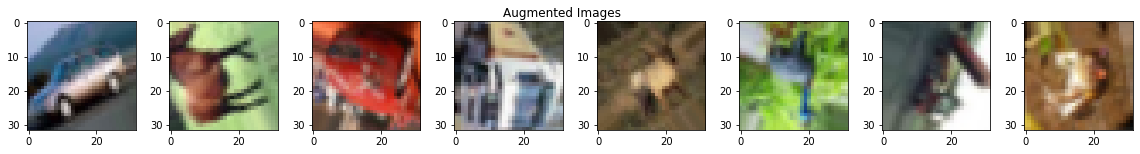

In [59]:
# plotting the aumentated images
#from PIL import Image

fig = plt.figure(figsize=(20,2))
for x_batch in dataget_train.flow(X_train_sample, batch_size=n):
  for i in range(0,n):
    ax = fig.add_subplot(1,n, i+1)
    ax.imshow((x_batch[i]))
  fig.suptitle('Augmented Images')
  plt.show()
  break;

### Training with Augmented Data

In [0]:
dataget_train = ImageDataGenerator(rotation_range = 90,
                                   width_shift_range = 0.1,
                                   horizontal_flip = True,
                                   vertical_flip = True)

dataget_train.fit(X_train)

In [0]:
# Model architecture

# initialize the model
cnn_model = Sequential()

#  CNN layer
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape = input_shape))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

#  CNN layer 
cnn_model.add(Conv2D(filters=124, kernel_size=(3,3),activation='relu'))
#cnn_model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

# Flatten 
cnn_model.add(Flatten())

# connecting layer
cnn_model.add(Dense(units=512, activation='relu'))
cnn_model.add(Dense(units=512, activation='relu'))

# output layer
cnn_model.add(Dense(units=10, activation='softmax'))

In [0]:
# compile the model
cnn_model.compile(optimizer=Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
cnn_model.fit_generator(dataget_train.flow(X_train, y_train, batch_size = 32), epochs=50,)

Epoch 1/50
1563/1563 [==============================] - 24s 15ms/step - loss: 1.7135 - acc: 0.3747
Epoch 2/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.6651 - acc: 0.3963
Epoch 3/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.6284 - acc: 0.4099
Epoch 4/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.6010 - acc: 0.4198
Epoch 5/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.5835 - acc: 0.4283
Epoch 6/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5610 - acc: 0.4372
Epoch 7/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5478 - acc: 0.4401
Epoch 8/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5304 - acc: 0.4489
Epoch 9/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5238 - acc: 0.4528
Epoch 10/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5182 - acc: 0.4546
Epoch 11/

In [68]:
# Evaluation
loss, accuracy = cnn_model.evaluate(X_test,y_test)
accuracy = round(accuracy,3)
print(f'Accuracy on test set: {accuracy}')

10000/10000 [==============================] - 1s 76us/sample - loss: 1.3317 - acc: 0.5291
Accuracy on test set: 0.5289999842643738
